In [2]:
import numpy as np
import matplotlib.pyplot as plt
from astropy.io import ascii

import halotools


# COSMOS SMF

In [70]:
#first quick&dirty SMF in COSMOS at z~0.2
cosmos_SMF_fit_file='Data/mf_mass2b_fl5b_tot_VmaxFit2D0.dat'
cosmos_SMF_points_file='Data/mf_mass2b_fl5b_tot_Vmax0.dat'
cosmos_SMF_fit_table=ascii.read(cosmos_SMF_fit_file)
cosmos_SMF_points_table=ascii.read(cosmos_SMF_points_file)
print(cosmos_SMF_fit_table)
print(cosmos_SMF_points_table)

  log_m       log_phi    log_phi_inf log_phi_sup
---------- ------------- ----------- -----------
 7.0000001    -1.1292782  -1.3514325  -0.7515293
 7.1000001    -1.1671982  -1.3809368  -0.8106275
 7.2000001    -1.2051121  -1.4104278  -0.8696547
 7.3000001    -1.2430185  -1.4399032  -0.9285961
 7.4000001    -1.2809157    -1.46936  -0.9874342
 7.5000001    -1.3188015   -1.498795  -1.0461478
 7.6000001    -1.3566734  -1.5282043  -1.1047115
 7.7000001    -1.3945281  -1.5575832  -1.1630952
 7.8000001    -1.4323617  -1.5869266  -1.2212625
 7.9000001    -1.4701694  -1.6162284  -1.2791703
       ...           ...         ...         ...
12.0000002    -8.8633021 -11.1221092  -7.4248918
12.1000002   -10.6793757 -13.6207341   -8.784317
12.2000002   -12.9787947 -16.7857124 -10.5021909
12.3000002   -15.8870082 -20.7897598 -12.6717689
12.4000002   -19.5618931 -25.8502724 -15.4103988
12.5000002   -24.2021596 -32.2409033 -18.8657631
12.6000002   -30.0579318  -40.306137 -23.2237385
12.7000002   -37.444

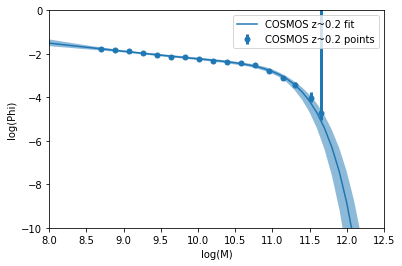

In [87]:
plt.plot(cosmos_SMF_fit_table['log_m'], cosmos_SMF_fit_table['log_phi'], label='COSMOS z~0.2 fit')
plt.fill_between(cosmos_SMF_fit_table['log_m'], cosmos_SMF_fit_table['log_phi_inf'], 
                 cosmos_SMF_fit_table['log_phi_sup'], alpha=0.5)
plt.errorbar(cosmos_SMF_points_table['col1'], cosmos_SMF_points_table['col2'], 
             yerr=[cosmos_SMF_points_table['col3'],cosmos_SMF_points_table['col4']], fmt='o', elinewidth=3,
            markersize=5, c='#1f77b4', label='COSMOS z~0.2 points')

plt.xlabel('log(M)')
plt.ylabel('log(Phi)')
plt.xlim([8,12.5])
plt.ylim([-10,0])
plt.legend()
plt.show()

# Halotools catalogs

In [12]:
from halotools.sim_manager import HaloTableCache
cache = HaloTableCache()
for entry in cache.log: print(entry) 

('bolplanck', 'rockstar', 'halotools_v0p4', '0.4966', '/Users/fardila/.astropy/cache/halotools/halo_catalogs/bolplanck/rockstar/hlist_0.66818.list.halotools_v0p4.hdf5')
('bolshoi', 'rockstar', 'halotools_v0p4', '-0.0003', '/Users/fardila/.astropy/cache/halotools/halo_catalogs/bolshoi/rockstar/hlist_1.00035.list.halotools_v0p4.hdf5')


In [19]:
from halotools.sim_manager import TabularAsciiReader
#halotools catalogs

halo_cat_file='Data/hlist_0.78209.list'
#scale(0) id(1) desc_scale(2) desc_id(3) num_prog(4) pid(5) upid(6) desc_pid(7) phantom(8) sam_mvir(9) mvir(10)
#rvir(11) rs(12) vrms(13) mmp?(14) scale_of_last_MM(15) vmax(16) x(17) y(18) z(19) vx(20) vy(21) vz(22) Jx(23) Jy(24) 
#Jz(25) Spin(26) Breadth_first_ID(27) Depth_first_ID(28) Tree_root_ID(29) Orig_halo_ID(30) Snap_num(31) 
#Next_coprogenitor_depthfirst_ID(32) Last_progenitor_depthfirst_ID(33) Last_mainleaf_depthfirst_ID(34) Tidal_Force(35)
#Tidal_ID(36) Rs_Klypin(37) Mvir_all(38) M200b(39) M200c(40) M500c(41) M2500c(42) Xoff(43) Voff(44) Spin_Bullock(45) 
#b_to_a(46) c_to_a(47) A[x](48) A[y](49) A[z](50) b_to_a(500c)(51) c_to_a(500c)(52) A[x](500c)(53) A[y](500c)(54) 
#A[z](500c)(55) T/|U|(56) M_pe_Behroozi(57) M_pe_Diemer(58) Macc(59) Mpeak(60) Vacc(61) Vpeak(62) Halfmass_Scale(63) 
#Acc_Rate_Inst(64) Acc_Rate_100Myr(65) Acc_Rate_1*Tdyn(66) Acc_Rate_2*Tdyn(67) Acc_Rate_Mpeak(68) Mpeak_Scale(69) 
#Acc_Scale(70) First_Acc_Scale(71) First_Acc_Mvir(72) First_Acc_Vmax(73) Vmax@Mpeak(74) Tidal_Force_Tdyn(75) 
#Log_(Vmax/Vmax_Tdyn)(76)

particle_catalog_file='Data/bplanck_particles_100m_a0.78209'
#7 columns

cols = {'upid': (5, 'i8')}
reader = TabularAsciiReader(halo_cat_file, cols) 
arr = reader.read_ascii() 


...Processing ASCII data of file: 
/Users/fardila/Documents/GitHub/dwarf_lensing/Data/hlist_0.78209.list
 
Total number of rows in detected data = 12939617
Number of rows in detected header = 62 

... working on chunk 0 of 18
... working on chunk 1 of 18
... working on chunk 2 of 18
... working on chunk 3 of 18
... working on chunk 4 of 18
... working on chunk 5 of 18
... working on chunk 6 of 18
... working on chunk 7 of 18
... working on chunk 8 of 18
... working on chunk 9 of 18
... working on chunk 10 of 18
... working on chunk 11 of 18
... working on chunk 12 of 18
... working on chunk 13 of 18
... working on chunk 14 of 18
... working on chunk 15 of 18
... working on chunk 16 of 18
... working on chunk 17 of 18
Total runtime to read in ASCII = 1.8 minutes




In [21]:
print(arr)
print(reader)

[(        -1,) (2404371171,) (2404371171,) ..., (        -1,) (        -1,)
 (        -1,)]


# not sure how to create a catalog object with files, so will use default cached catalogs for now

In [25]:
#not sure how to create a catalog object with files

from halotools.sim_manager import CachedHaloCatalog
halocat = CachedHaloCatalog()

In [41]:
from halotools.empirical_models import PrebuiltSubhaloModelFactory
model = PrebuiltSubhaloModelFactory('behroozi10', redshift=0.0)
model.populate_mock(halocat)
print(model.mock.galaxy_table[0:9])

halo_vy halo_upid halo_vx halo_vz ...   vy      vz   galid stellar_mass
------- --------- ------- ------- ... ------ ------- ----- ------------
 -34.49        -1   48.16  -82.51 ... -34.49  -82.51     0  5.19966e+10
 264.96        -1  -14.21 -132.11 ... 264.96 -132.11     1  1.04496e+11
 104.38        -1   -4.75  -61.29 ... 104.38  -61.29     2  5.22208e+10
  78.85        -1 -271.94  423.44 ...  78.85  423.44     3  1.27773e+11
 238.52        -1  317.08  179.34 ... 238.52  179.34     4  1.29183e+11
 186.67        -1   -57.3 -187.27 ... 186.67 -187.27     5  3.31246e+10
 -77.55        -1 -306.38 -386.58 ... -77.55 -386.58     6   1.2336e+11
 179.51        -1 -233.79   64.62 ... 179.51   64.62     7  1.45908e+11
 239.24        -1  -31.82 -397.53 ... 239.24 -397.53     8  1.36745e+11


In [55]:
#calculate smf
#Bolshoi volume was 250h^(-1)Mpc on each side http://iopscience.iop.org/article/10.1088/0004-637X/740/2/102/pdf

M     = model.mock.galaxy_table['stellar_mass']         #Read stellar masses
logM  = np.log10(M)                     #Take logarithm
nbins = 100                             #Number of bins to divide data into
V     = (250/0.7)**3                    #Survey volume in Mpc3
Phi,edg = np.histogram(logM,bins=nbins) #Unnormalized histogram and bin edges
dM    = edg[1] - edg[0]                 #Bin size
centers   = edg[0:-1] + dM/2.           #Mass axis
Phi   = Phi / float(V) / dM             #Normalize to volume and bin size
logPhi= np.log10(Phi)


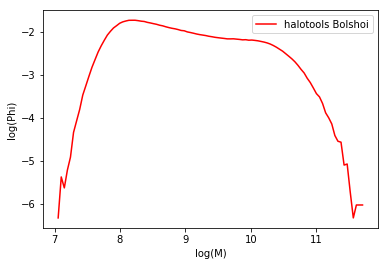

In [90]:
plt.plot(centers,logPhi, c='r', label='halotools Bolshoi')
plt.xlabel('log(M)')
plt.ylabel('log(Phi)')
plt.legend()
plt.show()

# plot both

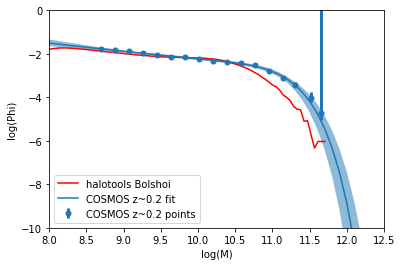

In [89]:
plt.plot(centers,logPhi, c='r', label='halotools Bolshoi')
plt.plot(cosmos_SMF_fit_table['log_m'], cosmos_SMF_fit_table['log_phi'], label='COSMOS z~0.2 fit')
plt.fill_between(cosmos_SMF_fit_table['log_m'], cosmos_SMF_fit_table['log_phi_inf'], 
                 cosmos_SMF_fit_table['log_phi_sup'], alpha=0.5)
plt.errorbar(cosmos_SMF_points_table['col1'], cosmos_SMF_points_table['col2'], 
             yerr=[cosmos_SMF_points_table['col3'],cosmos_SMF_points_table['col4']], fmt='o', elinewidth=3,
            markersize=5, c='#1f77b4', label='COSMOS z~0.2 points')

plt.xlabel('log(M)')
plt.ylabel('log(Phi)')
plt.xlim([8,12.5])
plt.ylim([-10,0])
plt.legend()
plt.show()